# Lab 4: Eigenthings



The main part of this lab will be about eigenvalues and eigenvectors. Recall that in Lab 1 we saw that Sage can compute these for us:

In [2]:
%display latex
M = Matrix(ZZ, 3, 3, [1,0,1, 0,1,1, 1,1,0])
pretty_print(M)
M.eigenvectors_right()

[1 0 1]
[0 1 1]
[1 1 0]

[(2, [
  (1, 1, 1)
  ], 1), (1, [
  (1, -1, 0)
  ], 1), (-1, [
  (1, 1, -2)
  ], 1)]

First, there are some review exercises. You will soon be starting to work on a project for this part of the course, and this will involve writing code to solve problems. These review exercises should help you to practise the skills that you've built up so far.

## 1. Review exercises

<div class="alert alert-info">
    <h3>Exercise 1.1 - Counting</h3>
    
**(a)** How many primes are there below 1000?

**(b)** How many of those are congruent to 1 modulo 4?

</div>

In [6]:
list_of_primes = prime_range(1,10^3)
len([x for x in range(1000) if x in list_of_primes])

168

In [8]:
len([x for x in range(1000) if x in list_of_primes and mod(x,4)==1])

80

In [10]:
len([])

0

<div class="alert alert-info">
    <h3>Exercise 1.2 - Sorting</h3>
    
**(a)** Write a function called `smaller_first_larger` that takes in a list `L` of numbers. It should
do the following:
* If L is the empty list `[]`, or contains only one number (e.g. `[7]`) then the function should return `L`.
* If the list has more than one number, we will use `x` to denote the first number in `L`. In this case, the function should return a tuple of 3 lists: first, a list consisting of all the numbers in `L` less than `x`, then a list containing the number `x`, and finally a list of all the remaining numbers in `L` which are larger (or equal) to `x`.

For example, `smaller_first_larger([7,2,3,11,8,1,7])` should return $([2,3,1],[7],[11,8,7])$.

Test your function on this example (and on others!).

**(b)** Write a new function called `my_sort` which takes a list of numbers and returns a list with those numbers in increasing order. Thus, `my_sort([7,2,3,11,8,1,7])` should return $[1,2,3,7,7,8,11]$.

_Hint:_ this can be done by copying the definition of `smaller_first_larger` and making a few tweaks, to use recursion.

</div>

In [19]:
def smaller_first_larger(L):
    
    if (len(L) == 0 or len(L) == 1):
        return L
    else:
        x = L[0]
        less = [i for i in L[1:] if i < x]
        greater = [i for i in L[1:] if i >= x]
        return (less,x,greater)

In [20]:
smaller_first_larger([7,2,3,11,8,1,7])

([2, 3, 1], 7, [11, 8, 7])

In [54]:
def my_sort(L):
     if (len(L) == 0 or len(L) == 1):
        return L
     else:
        x = L[0]
        less = [i for i in L[1:] if i < x]
        greater = [i for i in L[1:] if i >= x]
        return my_sort(less)+[x]+my_sort(greater)

In [55]:
my_sort([7,2,3,11,8,1,7])

[1, 2, 3, 7, 7, 8, 11]

<div class="alert alert-info">
    <h3>Exercise 1.3 - Timing</h3>
    
**(a)** Write a function called `time_eigen` that takes in two numbers, `n` and `trials`, and returns the mean time taken to compute `M.eigenvectors_right()` for `trials` different random `n`$\times$`n` matrices `M`.

**(b)** Produce a plot showing the mean running time of `eigenvectors_right()` for matrices of size $2\leq n\leq 10$ using 4 trials in each case. Make sure you label the axes!

**(c)** Produce a similar plot comparing the running time of `eigenvectors_right()` and `eigenvalues()`.

</div>

In [4]:
import time

def time_eigen(n,trails):
    time_taken = []
    for i in range(trails):
        M = random_matrix(ZZ, n, n)
        start_time = time.time() 
        M.eigenvectors_right()
        time_taken.append(time.time() - start_time)
    return mean(time_taken)

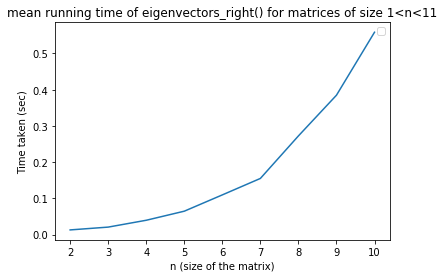

In [5]:
import matplotlib.pyplot as plt


ax = plt.subplot(111)
n = range(2,11)
time = [time_eigen(i,4) for i in n]

ax.plot(n,time)

ax.legend()
plt.title("mean running time of eigenvectors_right() for matrices of size 1<n<11")
plt.ylabel("Time taken (sec)")
plt.xlabel('n (size of the matrix)')

plt.show()

## 2. Eigenvalues and eigenvectors

There are several built-in functions in Sage that deal with eigenvalues and eigenvectors. Let's see some of them in action with an example:

In [64]:
A = matrix(ZZ, [[1,3],[-2,6]])
A

[ 1  3]
[-2  6]

In [65]:
A.characteristic_polynomial()

x^2 - 7*x + 12

Note that Sage works this out as $\det(x\mathbf{I}-A)$. We can check this, and we can even do it with $\lambda$ instead of $x$ since that is usually the variable we use when working out by hand:

In [66]:
var('lam', latex_name='\lambda')
(A+lam*matrix.identity(2)).determinant().expand()

lam^2 + 7*lam + 12

The eigenvalues of $A$ are just the roots of its characteristic polynomial, which we can find as follows:

In [67]:
A.charpoly().roots()

[(4, 1), (3, 1)]

<span class="label label-danger">Task</span> What are the roots? What do the $1$s mean?

There is a function to just find the eigenvalues:

In [70]:
A.eigenvalues()

[4, 3]

and one to find the corresponding eigenvectors:

In [71]:
A.eigenvectors_right()

[(4, [
  (1, 1)
  ], 1), (3, [
  (1, 2/3)
  ], 1)]

<span class="label label-danger">Task</span> Interpreting this output is a bit tricky -- recall that we did this near the start of Lab 1. Write some code (like we used in Lab 1) to check that $4$ is indeed an eigenvalue with eigenvector $\begin{pmatrix}1\\1\end{pmatrix}$.

In [75]:
evec = A.eigenvectors_right()[0][1]
eval1 = A.eigenvectors_right()[0][0]
evec,eval1

([
 (1, 1)
 ], 4)

We can get the eigenvalues and eigenvectors in another form using `eigenmatrix_right()`, which returns matrices $D$ and $P$ so that $AP=PD$, with $D$ diagonal.

In [76]:
D, P = A.eigenmatrix_right()
pretty_print((D, P))
A*P == P*D

(
[4 0]  [  1   1]
[0 3], [  1 2/3]
)

True

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>
    
Find the eigenvalues and eigenvectors of the following matrices, and make sure you understand the output in each case:
    
**(a)** $\begin{pmatrix}2 & 7 \\ -1 & -6\end{pmatrix}$

**(b)** $\begin{pmatrix}1 & 2 & 0 \\ -1 &-1& 1 \\ 0 & 1 & 1\end{pmatrix}$

**(c)** $\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}$

</div>

In [78]:
A = matrix(ZZ, [[2,7],[-1,-6]])
D, P = A.eigenmatrix_right()
pretty_print((D, P))

(
[ 1  0]  [   1    1]
[ 0 -5], [-1/7   -1]
)

In [79]:
A = matrix(ZZ, [[1,2,0],[-1,-1,1],[0,1,1]])
D, P = A.eigenmatrix_right()
pretty_print((D, P))

(
[1 0 0]  [   1    1    0]
[0 0 0]  [   0 -1/2    0]
[0 0 0], [   1  1/2    0]
)

In [80]:
A = matrix(ZZ, [[0,-1],[1,0]])
D, P = A.eigenmatrix_right()
pretty_print((D, P))

(
[-1*I    0]  [   1    1]
[   0  1*I], [ 1*I -1*I]
)

For the last part, you should have found complex numbers appearing. To get a more elegant presentation of the results, we can work with matrices over the "symbolic ring", which allows for matrices to have entries beyond $\mathbf{Z}$ or $\mathbf{Q}$ as we have been considering so far:

In [81]:
matrix(SR, [[0, -1], [1, 0]]).eigenvectors_right()

[(-I, [(1, I)], 1), (I, [(1, -I)], 1)]

In [82]:
out = matrix(SR, [[0, -1], [1, 0]]).eigenvectors_right()
eval1 = out[0][0]
eval1^2

-1

## 3. Gerschgorin discs

We will now look at a way to approximate the eigenvalues of a matrix; you may recall seeing this in _Introduction to Linear Algebra_ (see p330 of Poole's book).

Here is the definition from [Wikipedia](https://en.wikipedia.org/wiki/Gershgorin_circle_theorem):

> Let $A$ be a complex $n\times n$ matrix, with entries $a_{ij}$. For $i \in\{1,\dots,n\}$ let $R_i = \sum_{j\neq{i}} \left|a_{ij}\right|$ be the sum of the absolute values of the non-diagonal entries in the $i$-th row.  Let $D(a_{ii}, R_i ) \subseteq \mathbf{C}$ be a closed disc centered at $a_{ii}$ with radius $R_i$. Such a disc is called a **Gershgorin disc**.
>
> **Theorem**: Every eigenvalue of $ A $ lies within at least one of the Gershgorin discs.

Let's build up a picture of the Gerschgorin discs for an example (see Example 4.36 in Poole).

In [83]:
A = matrix(SR, [[2,1,0],[1/2,6,1/2],[2, 0, 8]])
A

[  2   1   0]
[1/2   6 1/2]
[  2   0   8]

First we need to find the values $R_i$:

In [86]:
n = A.nrows()
for i in range(n):
    Ri = sum([abs(A[i][j]) for j in range(n) if i!=j])
    print(Ri)

1
1
2


<span class="label label-danger">Task</span> Instead of a loop, use a list comprehension to produce a list `Ri_values` containing these values. So you should end up with `Ri_values == [1, 1, 2]`.

In [88]:
n = A.nrows()
Ri_values= [sum([abs(A[i][j]) for j in range(n) if i!=j]) for i in range(n)]
Ri_values == [1,1,2]

True

Now we can use the `disk` function to actually plot the discs -- first we produce a list `Ri_disks` which contains a plot of each disc separately, then we use `add` to combine all the plots into one:

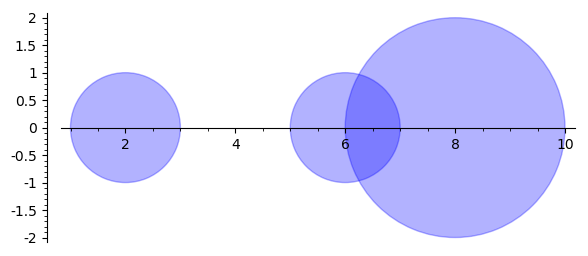

In [90]:
disks = []
for i in range(n):
    Ri=sum([abs(A[i][j]) for j in range(n) if i!=j])
    disks.append(disk((real_part(A[i][i]),imag_part(A[i][i])), Ri, (0,2*pi),alpha=0.3, thickness=1))
add(disks)

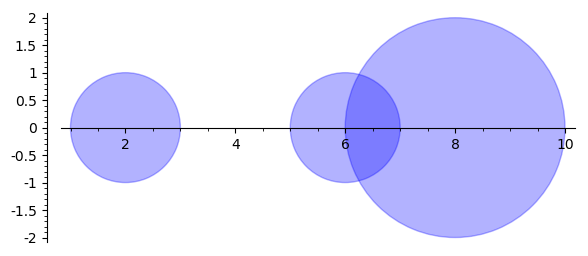

In [91]:
disks = [disk((real_part(A[i][i]),imag_part(A[i][i])), sum([abs(A[i][j]) for j in range(n) if i!=j]), (0,2*pi),alpha=0.3, thickness=1) for i in range(n)]
add(disks)

<span class="label label-danger">Task</span> Improve the appearance of the plot by using optional arguments to `disk`, for instance you could add:
``` 
alpha=0.3, thickness=1
```
Also, try producing the list with a list comprehension rather than a loop.

### Plotting the eigenvalues

We can add points to the plot to show the location of the eigenvalues, by getting Sage to work them out:

In [92]:
A.eigenvalues()

[-1/2*sqrt(38) + 5, 1/2*sqrt(38) + 5, 6]

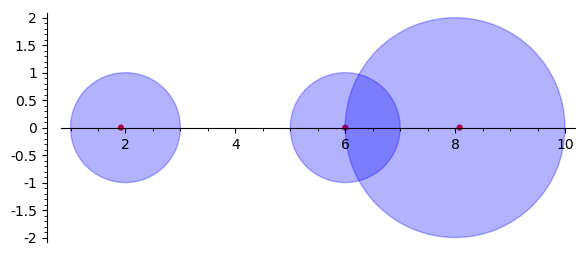

In [93]:
disks = []
for i in range(n):
    Ri=sum([abs(A[i][j]) for j in range(n) if i!=j])
    disks.append(disk((real_part(A[i][i]),imag_part(A[i][i])), Ri, (0,2*pi), alpha=0.3, thickness=1))
    disks.append(point((A.eigenvalues()[i], 0), size=20, rgbcolor=(1,0,0)))
add(disks)

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>
    
The example we have been considering has real eigenvalues, but in general the eigenvalues could be complex.

**(a)** Use a list comprehension to convert the list `A.eigenvalues()` into a list of coordinates in the complex plane, i.e. to convert each of the eigenvalues $z$ into $[Re(z), Im(z)]$.

**(b)** Use this approach on the matrix $\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}$, so you should produce a list of the coordinates of its eigenvalues in the complex plane. (The result should be `[[0,−1],[0,1]]`.)

</div>

In [94]:
[[z.real_part(), z.imag_part()] for z in A.eigenvalues()]

[[-1/2*sqrt(38) + 5, 0], [1/2*sqrt(38) + 5, 0], [6, 0]]

In [96]:
R90 = matrix(SR, [[0, -1], [1, 0]])
[[z.real_part(), z.imag_part()] for z in R90.eigenvalues()]

[[0, -1], [0, 1]]

<div class="alert alert-info">
    <h3>Exercise 3.2</h3>
    
**(a)** Write a procedure `g_discs` which takes in a square matrix `A` and produces a plot of its Gerschgorin disks. The plot should also include the actual locations of the eigenvalues. So for instance, `g_discs(A)` should produce the same plot as above (immediately before Exercise 3.1).

**(b)** Check your procedure on these matrices. (Note that to define these matrices, you should use `matrix(SR, ...` and capital `I` to stand for $i$.)

*(i)*  $\begin{pmatrix}2 & -i & 0 \\
1 & 2 i & 1+i \\
0 & 1 & -2 i\end{pmatrix}$

*(ii)* $\begin{pmatrix}4-3 i & i & 2 & -2 \\
i & -1+i & 0 & 0 \\
i + 1 & -i & 5+6 i & 2 i \\
1 & -2 i & 2 i & -5-5 i\end{pmatrix}$

*(iii)* $\begin{pmatrix}2 & \frac{1}{2} & 0 & 0 \\
\frac{1}{4} & 4 & \frac{1}{4} & 0 \\
0 & \frac{1}{6} & 6 & \frac{1}{6} \\
0 & 0 & \frac{1}{8} & 8\end{pmatrix}$

*Note:* some of these may take quite a long time to plot, because of the computations involved in finding the eigenvalues exactly.

</div>

In [107]:
def g_discs(A):
    eigenvalues = [[z.real_part(), z.imag_part()] for z in A.eigenvalues()]
    disks = []
    n = A.nrows()
    for i in range(n):
        Ri=sum([abs(A[i][j]) for j in range(n) if i!=j])
        disks.append(disk((real_part(A[i][i]),imag_part(A[i][i])), Ri, (0,2*pi), alpha=0.3, thickness=1))
        disks.append(point(eigenvalues[i], size=20, rgbcolor=(1,0,0)))
    return add(disks)

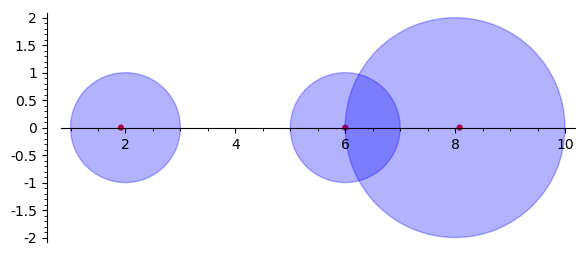

In [108]:
g_discs(A)

In [114]:
bi = matrix(SR, [[2,-I,0],[1,2*I,1+I],[0, 1, -2*I]])
bii = matrix(SR, [[4-3*I,I,2,-2],[I,-1+I,0,0],[I+1, -I, 5+6*I,2*I],[1, -2*I, 2*I,-5-5*I]])
biii = matrix(SR, [[2,1/2,0,0],[1/4,4,1/4,0],[0, 1/6,6,1/6],[0, 0, 1/8,8]])

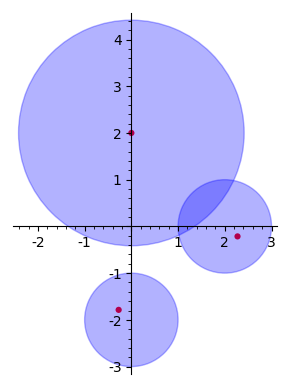

In [110]:
g_discs(bi)

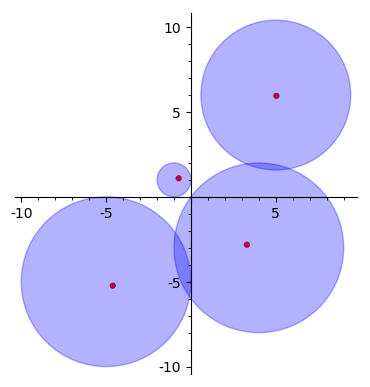

In [115]:
g_discs(bii)

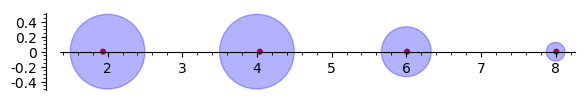

In [116]:
g_discs(biii)

## 4. Computing eigenvalues iteratively

If an $n\times n$ matrix has a *dominant eigenvalue* (meaning one which is strictly larger in absolute value than all the others), then we can compute it - and the corresponding *dominant eigenvector* - using an iterative approach.

(The approach we are using is the "power method" - see p322 of Poole.)

In [118]:
A = matrix(QQ, [[1,1],[2,0]])
xs = [vector([1,0])] # an initial guess
for i in range(10):
    xs.append(A*xs[i])
xs

[(1, 0),
 (1, 2),
 (3, 2),
 (5, 6),
 (11, 10),
 (21, 22),
 (43, 42),
 (85, 86),
 (171, 170),
 (341, 342),
 (683, 682)]

This shows the sequence of vectors we obtain by successive applications of $A$. Notice that they are all in roughly the same direction, being quite close to scaled versions of $\begin{pmatrix}1 \\ 1\end{pmatrix}$.

In fact, the ratio of the first component to the second is approaching 1:

In [119]:
[v[0]/v[1] for v in xs if v[1]!=0]

[1/2, 3/2, 5/6, 11/10, 21/22, 43/42, 85/86, 171/170, 341/342, 683/682]

In [120]:
print([N(v[0]/v[1]) for v in xs if v[1]!=0])

[0.500000000000000, 1.50000000000000, 0.833333333333333, 1.10000000000000, 0.954545454545455, 1.02380952380952, 0.988372093023256, 1.00588235294118, 0.997076023391813, 1.00146627565982]


This suggests that $\begin{pmatrix}1 \\ 1\end{pmatrix}$ is an eigenvector of $A$.

Now if $x_i=$ `xs[i]` is close to being an eigenvector of $A$ then we would expect $Ax_i\approx\lambda x_i$ (where $\lambda$ is the eigenvalue). Since $Ax_i=x_{i+1}$ (`A*xs[i]=xs[i+1]`), we should have $x_{i+1}\approx \lambda x_i$.

So if we look at the first components of `xs[i+1]` and `xs[i]`, the ratio should approach $\lambda$:

In [121]:
print([N(xs[i+1][0]/xs[i][0]) for i in [1..9]])

[3.00000000000000, 1.66666666666667, 2.20000000000000, 1.90909090909091, 2.04761904761905, 1.97674418604651, 2.01176470588235, 1.99415204678363, 2.00293255131965]


These seem to be approaching 2, suggesting that is the eigenvalue.

We can check against Sage's exact calculation:

In [122]:
A.right_eigenmatrix()

(
[ 2  0]  [ 1  1]
[ 0 -1], [ 1 -2]
)

<div class="alert alert-info">
    <h3>Exercise 4.1</h3>
    
Modify this code so that at each step, the new vector `A*xs[i]` is rescaled so that the largest entry is 1. (Use `v.norm(Infinity)` to find the component of `v` with the largest absolute value, i.e. the "infinity norm" of the vector).

You should store the rescaling value at each stage, building up the list `ms`. You should then find that the `xs` are converging to the eigenvector and the `ms` to the eigenvalue. Demonstrate this for the matrix $\begin{pmatrix}8 & 2 \\ 3&3\end{pmatrix}$.

</div>

In [143]:
A = matrix(QQ, [[1,1],[2,0]])
xs = [vector([1,0])] # an initial guess
ms = []
for i in range(10):
    xs.append((A*xs[i])/xs[i].norm(Infinity))
    ms.append(xs[i].norm(Infinity))
xs,ms

([(1, 0),
  (1, 2),
  (3/2, 1),
  (5/3, 2),
  (11/6, 5/3),
  (21/11, 2),
  (43/22, 21/11),
  (85/43, 2),
  (171/86, 85/43),
  (341/171, 2),
  (683/342, 341/171)],
 [1, 2, 3/2, 2, 11/6, 2, 43/22, 2, 171/86, 2])